# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [113]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [114]:
### To start off let's do a basic data summary.
import numpy as np

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = test['features'].shape

# TODO: how many classes are in the dataset
n_classes = len(np.unique(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (12630, 32, 32, 3)
Number of classes = 43


In [115]:
#DATA DIMENSIONS
img_size = 32

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

#n_classes = 43

(32, 32, 3)


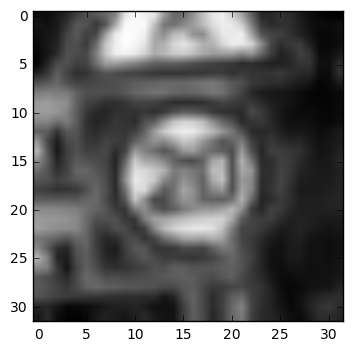

In [116]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow
import cv2

print (X_train[0].shape)
gray_image = cv2.cvtColor(X_train[0], cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [117]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

(32, 32)


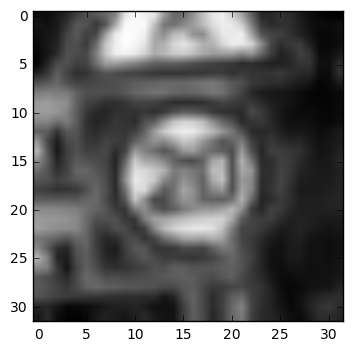

In [118]:
#grayscale
def grayscale_image(temp):
    return cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

def grayscale_array(X):
    X_gray = np.empty(X[:,:,:,0].shape)
    for i in range(len(X_gray)):
        X_gray[i] = grayscale_image(X[i])
    return X_gray

X_train_gray = grayscale_array(X_train)
X_test_gray = grayscale_array(X_test)

plt.imshow(X_train_gray[0], cmap='gray')
print (X_train_gray[0].shape)

In [119]:
# def normalize_greyscale(image_data):
#     """
#     Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
#     :param image_data: The image data to be normalized
#     :return: Normalized image data
#     """
#     # Min-Max scaling for greyscale image data
#     a = 0.1
#     b = 0.9
#     x_min = 0
#     x_max = 255
#     new_image_data = a + ( (image_data - x_min)*(b-a)/(x_max - x_min) )
#     return new_image_data

# train_features = normalize_greyscale(X_train_gray)
# test_features = normalize_greyscale(X_test_gray)

# plt.imshow(train_features[0], cmap='gray')
# print (train_features.shape)

### NORMALIZING DECREASED SCORES
train_features = X_train_gray
test_features = X_test_gray

In [120]:
from sklearn.preprocessing import LabelBinarizer
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)
is_labels_encod = True

train_labels.shape

(39209, 43)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:** I grayscaled the feature images and one hot encoded the labels.

In [121]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** The data was already split into training and testing sets so I did not have any split to do. I did not use a validation set because I reset the graph each time and it wasn't necessary to create a validation set. Having more data means my model learns better by training on more data. 

I tried using jittering for creating additional data but it affected scores negatively. 

In [227]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
tf.reset_default_graph()

In [228]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

In [229]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [230]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    
    # Strides are set to 1 in all dimensions.
    # e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    if use_pooling:
        # 2x2 max-pooling
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [231]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The number of features is: img_height * img_width * num_channels
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [232]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [233]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, 43], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

In [234]:
##CONV LAYER 1
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

layer_conv1

<tf.Tensor 'Relu:0' shape=(?, 16, 16, 16) dtype=float32>

In [235]:
##CONV LAYER 2
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

layer_conv2

<tf.Tensor 'Relu_1:0' shape=(?, 8, 8, 36) dtype=float32>

In [236]:
##DROPOUT
keep_prob = tf.placeholder(tf.float32)
layer_conv2 = tf.nn.dropout(layer_conv2, keep_prob)

layer_conv2

<tf.Tensor 'dropout/mul:0' shape=(?, 8, 8, 36) dtype=float32>

In [237]:
##CONV LAYER 3
layer_conv3, weights_conv3 = \
    new_conv_layer(input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

layer_conv3

<tf.Tensor 'Relu_2:0' shape=(?, 4, 4, 16) dtype=float32>

In [238]:
##CONV LAYER 4
layer_conv4, weights_conv4 = \
    new_conv_layer(input=layer_conv3,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

layer_conv4

<tf.Tensor 'Relu_3:0' shape=(?, 2, 2, 36) dtype=float32>

In [239]:
## DROPOUT
# keep_prob= tf.placeholder(tf.float32)

layer_conv4 = tf.nn.dropout(layer_conv4, keep_prob)

layer_conv4


<tf.Tensor 'dropout_1/mul:0' shape=(?, 2, 2, 36) dtype=float32>

In [240]:
##FLATTEN LAYER
layer_flat, num_features = flatten_layer(layer_conv4)

layer_flat

<tf.Tensor 'Reshape_1:0' shape=(?, 144) dtype=float32>

In [241]:
##FULLY CONNECTED LAYER 1
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

layer_fc1

<tf.Tensor 'Relu_4:0' shape=(?, 128) dtype=float32>

In [242]:
##FULLY CONNECTED LAYER 2
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=n_classes,
                         use_relu=False)

layer_fc2

<tf.Tensor 'add_5:0' shape=(?, 43) dtype=float32>

In [243]:
##PREDICTED CLASS
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [244]:
##COST FUNCTION
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)

cost = tf.reduce_mean(cross_entropy)

In [245]:
##OPTIMIZATION METHOD
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

In [246]:
##PERFORMANCE MEASURES
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** My model consists of 2 convoluted neural networks, followed by a dropout layer. I then used 2 convoluted neural networks followed by dropout and then 2 fully connected layers. Finally a softmax function was used. 

Probability for dropout: 0.5

(2 conv nets > dropout > 2 conv nets > dropout > 2 fc)

In [247]:
### Train your model here.
### Feel free to use as many code cells as needed.
session = tf.Session()
session.run(tf.initialize_all_variables())
train_batch_size = 128

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [248]:
def next_batch(x, y, batch_size):
    assert len(x) == len(y)
    indices = np.random.choice(len(x), batch_size)
    x_ret = [x[i] for i in indices]
    y_ret = [y[i] for i in indices]
    return x_ret, y_ret

In [249]:
import time
from datetime import timedelta
# Counter for total number of iterations performed so far.
total_iterations = 0

#flatten train_features 
images = train_features
images = images.reshape(images.shape[0], images.shape[1] * images.shape[2])

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations,images

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = next_batch(images, train_labels, train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch, keep_prob:0.5}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 500 iterations.
        if i % 500 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
    
optimize(num_iterations=10000)   

Optimization Iteration:      1, Training Accuracy:   4.7%
Optimization Iteration:    501, Training Accuracy:  32.0%
Optimization Iteration:   1001, Training Accuracy:  62.5%
Optimization Iteration:   1501, Training Accuracy:  75.8%
Optimization Iteration:   2001, Training Accuracy:  79.7%
Optimization Iteration:   2501, Training Accuracy:  85.2%
Optimization Iteration:   3001, Training Accuracy:  87.5%
Optimization Iteration:   3501, Training Accuracy:  88.3%
Optimization Iteration:   4001, Training Accuracy:  93.0%
Optimization Iteration:   4501, Training Accuracy:  90.6%
Optimization Iteration:   5001, Training Accuracy:  91.4%
Optimization Iteration:   5501, Training Accuracy:  89.8%
Optimization Iteration:   6001, Training Accuracy:  95.3%
Optimization Iteration:   6501, Training Accuracy:  94.5%
Optimization Iteration:   7001, Training Accuracy:  92.2%
Optimization Iteration:   7501, Training Accuracy:  94.5%
Optimization Iteration:   8001, Training Accuracy:  91.4%
Optimization I

In [250]:
# Split the test-set into smaller batches of this size.
test_batch_size = 256

#flatten test images
new_images = test_features
new_images = new_images.reshape(new_images.shape[0], new_images.shape[1] * new_images.shape[2])

#takes in test images, test labels, and number of testing images
def print_test_accuracy(images, labels, size):
    
    #decrease batch size if test images are small
    if (size != n_test):
        global test_batch_size
        test_batch_size = 1
    
    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=size, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < n_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, n_test)

        # Get the images from the test-set between index i and j.
        temp_images = images[i:j, :]

        # Get the associated labels.
        new_labels = labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: temp_images,
                     y_true: new_labels, keep_prob: 1.0}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = np.argmax(labels, axis=1)

    # Create a boolean array whether each image is correctly classified.
    correct = np.equal(cls_true , cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = np.sum(correct)

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / size

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, size))

In [251]:
print_test_accuracy(new_images, test_labels, n_test)

Accuracy on Test-Set: 95.6% (12076 / 12630)


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I used AdamOptimizer from the Tensorflow tutorial. I used a learning rate of 0.001 and 10,000 iterations of it. My batch size was 128 for training. 


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** I experimented with the hypermaraters and modified an architecture given in a tutorial online (credits: Hvass Lab).

{Please suggest if a different combination of hyperparameters can be used to obtain better results}

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [252]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

(32, 32)


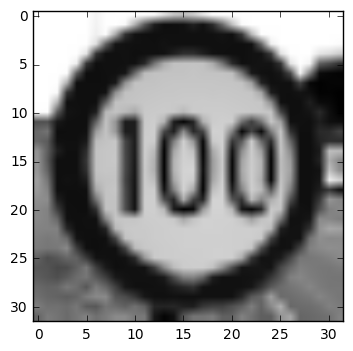

(32, 32)


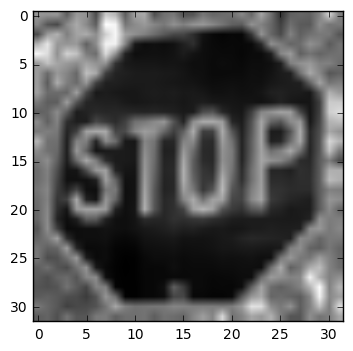

(32, 32)


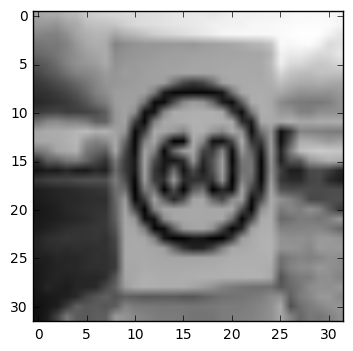

(32, 32)


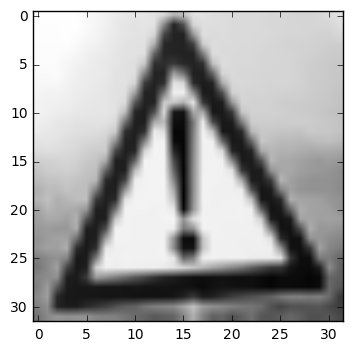

(32, 32)


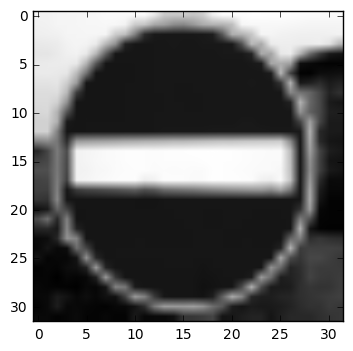

In [253]:
import glob,os
import cv2
ulpath = os.getcwd()

trial_features = np.zeros(shape=(5,32,32), dtype="float32")
count = 0

for infile in glob.glob( os.path.join(ulpath, "*.jpg") ):
    im = cv2.imread(infile) #read image
    
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) #convert to grayscale
    im = cv2.resize(im,(32,32), interpolation = cv2.INTER_AREA) #reshape to 2d array and 32x32 size
    
    trial_features[count] = im
    
    print (trial_features[count].shape) 
    plt.imshow(trial_features[count], cmap="gray")
    plt.show()
    
    count += 1
    
trial_features = trial_features.reshape(trial_features.shape[0], trial_features.shape[1] * trial_features.shape[2])

#Generate labels
trial_labels = np.zeros(shape=(5,43), dtype="float32")
trial_labels[0][7] = 1 #100kmph
trial_labels[1][14] = 1 #stop
trial_labels[2][3] = 1 #60kmph
trial_labels[3][18] = 1 #caution
trial_labels[4][17] = 1 #no entry

In [254]:
print (trial_labels[0])

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:** The images have more background noise than the images in the dataset. Some images are also very zoomed. This can make classification a difficult task.

In [255]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
print_test_accuracy(trial_features, trial_labels, 5)

Accuracy on Test-Set: 60.0% (3 / 5)


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:** The model classified 3/5 images correctly. I'd say it doesn't do equally well on actual images. 

In [256]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
pred = tf.nn.top_k(y_pred_cls,k=5)
feed_dict = {x: trial_features, y_true: trial_labels, keep_prob: 1}
session.run(pred, feed_dict=feed_dict)

TopKV2(values=array([18, 14,  8,  6,  3], dtype=int64), indices=array([3, 1, 4, 0, 2]))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:** The model is certain of predictions for 3 images. It is uncertain for the image for "100kmph" and it incorrectly classifies it as 80kmph. It also misclassifies "no entry" as "120kmph speed limit"

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:** I have already explained the architecture above. Not sure what I need to add here.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.